Simulations:   0%|          | 0/2 [00:00<?, ?it/s]c:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
c:\Users\feige\Desktop\ifa-2022\complex_systems\week2\Exc2Task1.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists

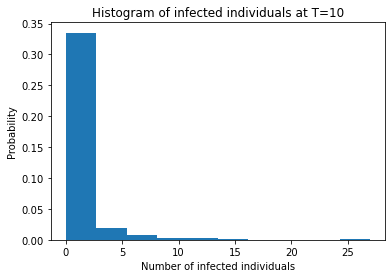

(bins of histogram: [ 0.   2.7  5.4  8.1 10.8 13.5 16.2 18.9 21.6 24.3 27. ])
Task 1 b) 
	Probability that infection still ongoing at T=10: 0.888889


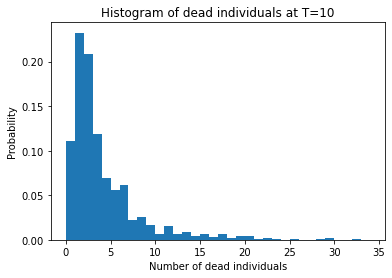

	Average number of dead individuals at T=10: 3.678000
	Standard deviation of dead individuals at T=10: 4.407076

	Average number of dead individuals at all steps: 3.938795
	Standard deviation of dead individuals at all steps: 5.139300


In [1]:
#Task 1b:
import Exc2Task1 as task1
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

t_final = 10.0
x = np.array([[task1.lamdba/task1.delta],
              [2],
              [0],
              [0]])
infected = []
dead_at_t10 = []
dead_all_steps = []
for i in range(1000):
    states0, states1, states2, states3, times = task1.SSA(task1.stochiometry_matrix, x, t_final, task1.lamdba, task1.delta, task1.beta, task1.k_r)
    infected.append(states1[-1])
    dead_at_t10.append(states3[-1])
    dead_all_steps.extend(states3)
#histogram of X[1] (infected) @T=10 (last point)
# plt.hist(infected, density=True, bins=range(0,27))
plt.hist(infected, density=True)
# add title and axis names
plt.title('Histogram of infected individuals at T=10')
plt.xlabel('Number of infected individuals')
plt.ylabel('Probability')
plt.show()

# print all bins of histogram
print('(bins of histogram: %s)' %(np.histogram(infected, density=True)[1]))

#TODO: depict probability that 0,...,20 individuals infected
#TODO: what is probablity that infection ongoing at T=10
print('Task 1 b) \n\tProbability that infection still ongoing at T=10: %f' %(np.count_nonzero(states1)/states1.size))

#histogram of X[3] (dead_at_t10) @T=10
plt.figure()
plt.hist(dead_at_t10, density=True, bins=range(0,35))
# add title and axis names
plt.title('Histogram of dead individuals at T=10')
plt.xlabel('Number of dead individuals')
plt.ylabel('Probability')
plt.show()

# how many individuals dead at T=10 on average
print('\tAverage number of dead individuals at T=10: %f' %(np.mean(dead_at_t10)))
# std of dead individuals at T=10
print('\tStandard deviation of dead individuals at T=10: %f' %(np.std(dead_at_t10)))

# how many individuals dead at all steps
print('\n\tAverage number of dead individuals at all steps: %f' %(np.mean(dead_all_steps)))
# std of dead individuals at all steps
print('\tStandard deviation of dead individuals at all steps: %f' %(np.std(dead_all_steps)))


In [2]:
print("------- Task 2 b) -------")

------- Task 2 b) -------


Simulating trajectories:   0%|          | 0/2 [00:00<?, ?it/s]c:\Users\feige\Desktop\ifa-2022\complex_systems\week2\Exc2Task2.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(x_list), np.array(timestep_list)
Simulations: 100%|██████████| 200/200 [01:53<00:00,  1.76it/s]


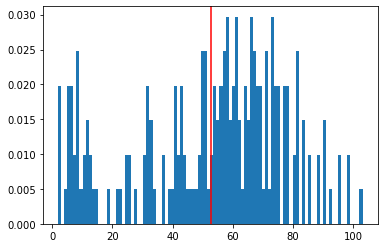

In [3]:
#Task 2b:
import Exc2Task2 as task2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

nrSimulations = 2
x = np.array([[40.0]])

#   r1  r2  r3  r4
#X1  1  -1   1  -1
stochiometry_matrix = np.array([[1,-1,1,-1]])
t_final = 5.0
infected = []
for i in tqdm(range(200), desc='Simulations: '):
    states, times = task2.SSA(stochiometry_matrix, x, t_final)
    infected.append(states[-1])

#histogram of X[1] (infected) @T=10 (last point)
plt.hist(infected, density=True, bins=100)
x = sum(infected) / 200
plt.axvline(x = x, color = 'r', label = 'axvline - full height')
